<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/btp_clg_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import keras,os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


# 0 - Tumor
# 1 - Normal
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
paths = []

for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [4]:
data = np.array(data)
data.shape

(2891, 224, 224, 3)

In [5]:
result = np.array(result)
result = result.reshape(2891,2)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)

In [7]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
from tensorflow.keras.optimizers import Adam 
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
y_train.shape

(1734, 2)

In [9]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 40, validation_data = (x_val, y_val))

Epoch 1/50
44/44 [==============================] - 50s 701ms/step - loss: 136.4048 - accuracy: 0.5334 - val_loss: 0.6739 - val_accuracy: 0.6661
Epoch 2/50
44/44 [==============================] - 26s 585ms/step - loss: 0.6192 - accuracy: 0.6442 - val_loss: 0.6990 - val_accuracy: 0.5796
Epoch 3/50
44/44 [==============================] - 26s 590ms/step - loss: 0.6031 - accuracy: 0.7105 - val_loss: 0.5294 - val_accuracy: 0.7111
Epoch 4/50
44/44 [==============================] - 26s 598ms/step - loss: 0.5365 - accuracy: 0.7313 - val_loss: 0.5946 - val_accuracy: 0.7093
Epoch 5/50
44/44 [==============================] - 27s 604ms/step - loss: 0.5105 - accuracy: 0.7313 - val_loss: 0.4974 - val_accuracy: 0.7336
Epoch 6/50
44/44 [==============================] - 27s 607ms/step - loss: 0.4762 - accuracy: 0.7774 - val_loss: 0.4532 - val_accuracy: 0.7803
Epoch 7/50
44/44 [==============================] - 27s 613ms/step - loss: 0.4102 - accuracy: 0.8137 - val_loss: 0.4017 - val_accuracy: 0.80

In [10]:
pred = model.predict(
    x_test,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)


In [23]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results)


Evaluate on test data
10/10 [==============================] - 7s 247ms/step - loss: 0.1685 - accuracy: 0.9499
test loss, test acc: [0.16854964196681976, 0.9499136209487915]


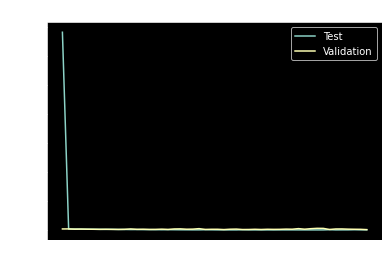

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

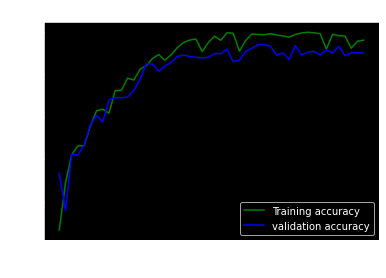

In [13]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
print('loss', 'accuracy')
model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=40,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)
# print(pred.metrics_names)
print(model)
# pred

loss accuracy


In [15]:
a.math.confusion_matrix(
    y_test,
    pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)


NameError: ignored